<a href="https://colab.research.google.com/github/xcellentbird/Study-Deep_Learning/blob/main/MNIST_%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EC%84%A4%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from tensorflow import keras

# MNIST 데이터셋을 불러와 학습, 테스트셋으로 나눕니다.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 28*28 픽셀의 이미지가 학습과 테슷트셋에 60000,10000개 있는 것을 확인할 수 있습니다.
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [36]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0 # 픽셀 데이터 정구화
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state= 45)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [37]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28))) # 28*28픽셀을 펴준다
model.add(keras.layers.Dense(100, activation='sigmoid')) # 활성함수는 sigmoid(이진 분류에 쓰인다)
model.add(keras.layers.Dense(10, activation='softmax')) # Softmax는 분류 결과를 확률로 표현해준다

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [38]:
# optimizer를 명명하지 않으면, 기본적으로 RMSprop이 사용된다.
# 손실함수 = sparse_categorical_crossentropy: 다중 분류에서 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# batch_size는 기본적으로 32개
model.fit(train_scaled, train_target, epochs=5)

sigmoid_RMS = model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7761 - accuracy: 0.7479
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4140 - accuracy: 0.8502
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8656
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3488 - accuracy: 0.8745
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3477 - accuracy: 0.8731


In [39]:
print(sigmoid_RMS)

[0.34769245982170105, 0.8730833530426025]


In [40]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))

# 이번에는 relu 활성함수 적용. 이 함수는 특히 이미지에 특화.
# 시그모이드보다 신속하게 대응한다.
model.add(keras.layers.Dense(100, activation='relu')) 
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# optimizer를 명명하지 않으면, 기본적으로 RMSprop이 사용된다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# batch_size는 기본적으로 32개
model.fit(train_scaled, train_target, epochs=5)

relu_RMS = model.evaluate(val_scaled, val_target)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6846 - accuracy: 0.7631
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4049 - accuracy: 0.8560
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3563 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0

In [41]:
print(relu_RMS)

[0.3689519166946411, 0.8693333268165588]


In [42]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 최적화기로 확률적 경사 하강법 사용. momentum, 
# nesterov은 모멘텀 최적화를 2번 반복 구현하여 더 나은 성능을 제공한다.
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

relu_SGD = model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7006 - accuracy: 0.7564
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4100 - accuracy: 0.8542
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3474 - accuracy: 0.8740
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3476 - accuracy: 0.8715


In [43]:
print(relu_SGD)

[0.34756413102149963, 0.8715000152587891]


In [44]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Adam 최적화기는 모멘텀 최적화와 RMSprop(적응적 학습률 적용: 학습률을 최적점 가까이 갈 수록 낮춘다 == Adagrad)의 장점을 모두 가지고 있다.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

relu_Adam = model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6746 - accuracy: 0.7609
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4012 - accuracy: 0.8582
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3614 - accuracy: 0.8685
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3311 - accuracy: 0.8795
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3522 - accuracy: 0.8695


In [45]:
print(relu_Adam)

[0.3521851897239685, 0.8694999814033508]


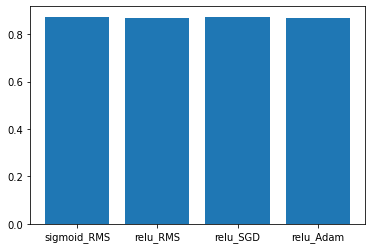

In [46]:
import matplotlib.pyplot as plt

plt.bar(range(4), [sigmoid_RMS[1], relu_RMS[1], relu_SGD[1], relu_Adam[1]])
plt.xticks(range(4), ['sigmoid_RMS', 'relu_RMS', 'relu_SGD', 'relu_Adam'])
plt.show()

# 근데 무엇이... 4개의 정확도가 모두 똑같이 나왔다.